In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

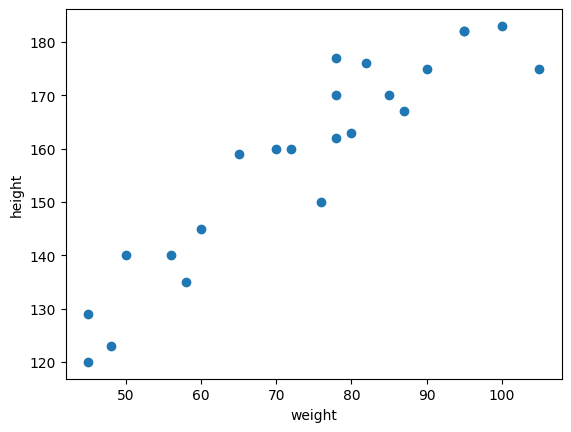

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


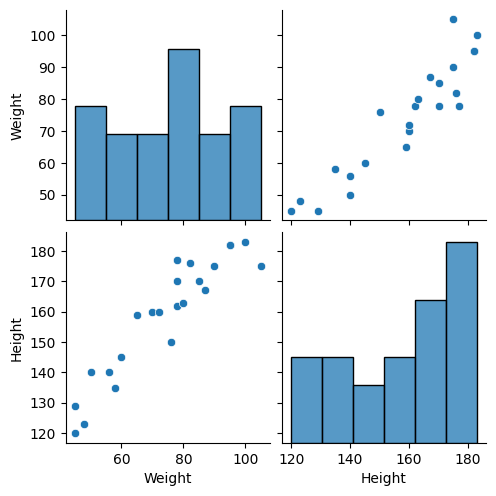

In [7]:
sns.pairplot(df)

In [8]:
#ind and dep
X=df[['Weight']]
y=df['Height']

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [10]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [11]:
X_test

array([[ 0.16286023],
       [ 0.16286023],
       [-1.54717219],
       [ 1.04378602],
       [-0.5107889 ],
       [ 1.56197766],
       [-0.87352305]])

In [12]:
#simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
print(lr.coef_)
print(lr.intercept_)

[17.03207732]
157.8125


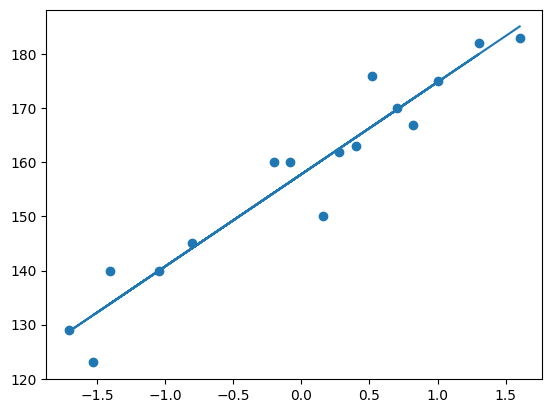

In [14]:
#best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [15]:
y_pred=lr.predict(X_test)

In [16]:
#performance matrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

111.40618853635719
10.133715946053732


In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7653497576392064


In [18]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7184197091670477

In [19]:
#Ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [20]:
prediction=model.predict(X_test)
print(prediction)

[  2.77384804   2.77384804 -26.35155634  17.77784423  -8.69979611
  26.60372434 -14.87791219]


In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.1745
Date:                Sat, 25 May 2024   Prob (F-statistic):                       0.682
Time:                        11:25:34   Log-Likelihood:                         -103.69
No. Observations:                  16   AIC:                                      209.4
Df Residuals:                      15   BIC:                                      210.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
lr.predict(scaler.transform([[75]]))
lr.predict(scaler.transform([[85]]))

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([166.76446412])